# Objective : Face Mask Detection 

## using Python, OpenCV, TensorFlow and Deep Learning

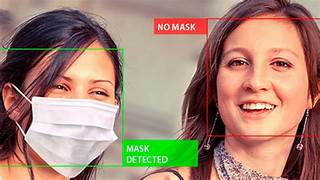

# Import Python Modules

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense , Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from imutils import paths

import matplotlib.pyplot as plt
import numpy as np
import os
 

In [16]:
EPOCHS = 10
BS = 32

# Preprocessing the Images

In [7]:
DIRECTORY = r"C:\Users\91956\OneDrive\face-mask-project-main\face-mask-project-main\Face-Mask-Detection-master\dataset"
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

[INFO] loading images...


C:\Users\91956\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# One Hot Encoder

In [8]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

# Train Test Split

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

# Data Augmentation

In [10]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

# Base Model - MobileNetV2

In [11]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

# Adding Extra Layers to Base Model

In [12]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# Base Model as Not Trainable

In [13]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

# Model Compile & fit

In [14]:
# compile our model
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])

[INFO] compiling model...



In [17]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    batch_size=BS,
    epochs=EPOCHS,validation_data=(testX, testY))

[INFO] training head...
Epoch 1/10
96/96 [==============================] - 53s 549ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 2/10
96/96 [==============================] - 52s 545ms/step - loss: 0.0369 - accuracy: 0.9866 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 3/10
96/96 [==============================] - 52s 544ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0318 - val_accuracy: 0.9909
Epoch 4/10
96/96 [==============================] - 53s 547ms/step - loss: 0.0270 - accuracy: 0.9899 - val_loss: 0.0267 - val_accuracy: 0.9922
Epoch 5/10
96/96 [==============================] - 54s 567ms/step - loss: 0.0273 - accuracy: 0.9902 - val_loss: 0.0293 - val_accuracy: 0.9909
Epoch 6/10
96/96 [==============================] - 56s 586ms/step - loss: 0.0314 - accuracy: 0.9892 - val_loss: 0.0249 - val_accuracy: 0.9909
Epoch 7/10
96/96 [==============================] - 53s 549ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.030

In [18]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 9s 334ms/step
              precision    recall  f1-score   support

   with_mask       0.97      1.00      0.98       383
without_mask       1.00      0.97      0.98       384

    accuracy                           0.98       767
   macro avg       0.98      0.98      0.98       767
weighted avg       0.98      0.98      0.98       767



In [20]:
print("[INFO] saving mask detector model...")
model.save("mask_detector_model.h5")
model.save("mask_detector_model.keras")

[INFO] saving mask detector model...


In [21]:
import tensorflow as tf
import keras
import imutils
import numpy as np
import cv2
import matplotlib
import scipy

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)
print("Imutils Version:", imutils.__version__)
print("NumPy Version:", np.__version__)
print("OpenCV Version:", cv2.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("SciPy Version:", scipy.__version__)


TensorFlow Version: 2.15.0
Keras Version: 2.15.0
Imutils Version: 0.5.4
NumPy Version: 1.24.4
OpenCV Version: 4.10.0
Matplotlib Version: 3.7.2
SciPy Version: 1.10.1
